In [1]:
import pandas

size_log = pandas.read_pickle("4-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("4-generated-mdps/fail.pkl.gz")

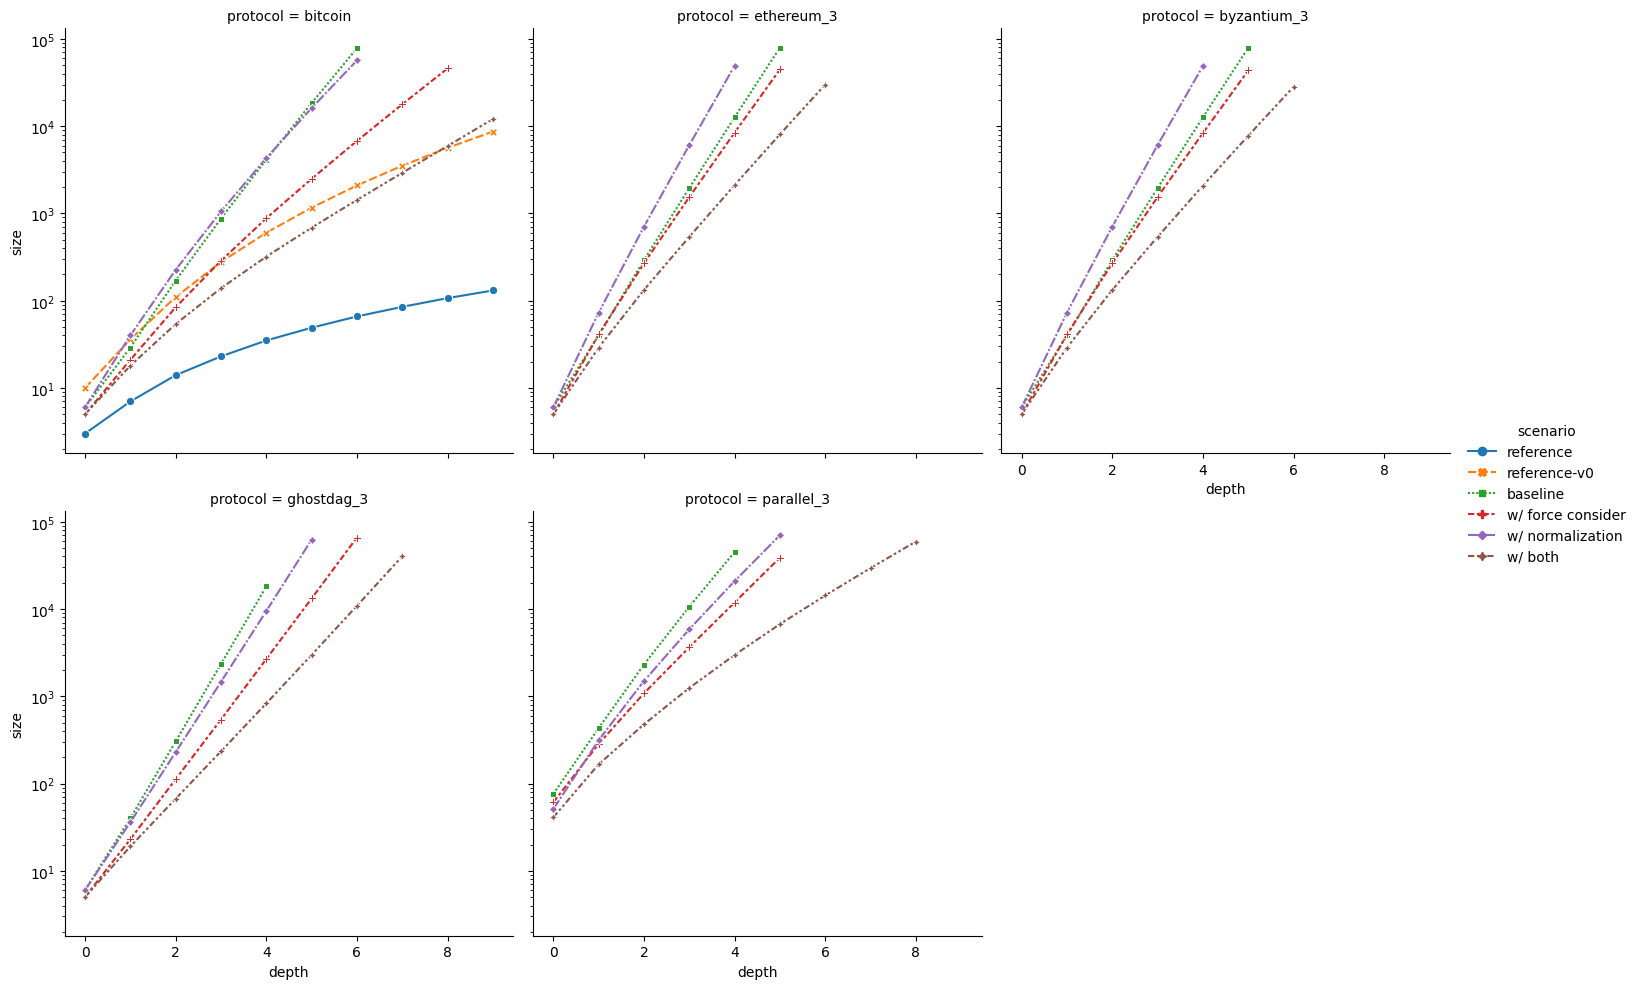

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("depth < 10"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
    col="protocol",
    col_wrap=3,
).set(yscale="log")

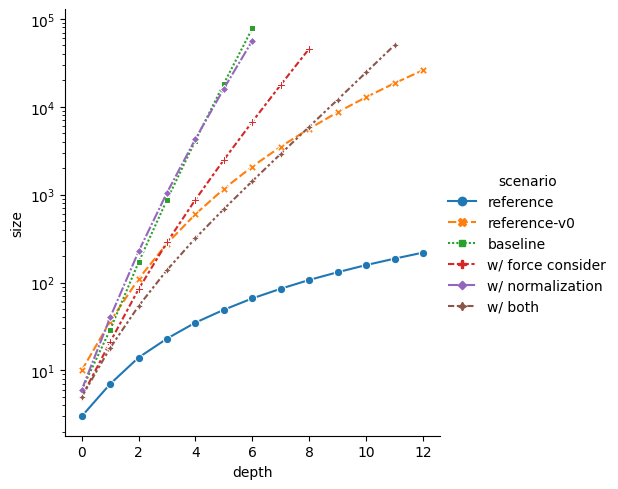

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and depth < 13"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
).set(yscale="log")

In [4]:
scenario_labels = {
    "reference": "reference-fc16",
    "reference-v0": "drop",
    "baseline": "baseline",
    "w/o garbage collection": "baseline-gc",
    "w/ force consider": "baseline+fc",
    "w/ normalization": "baseline+n",
    "w/ both": "baseline+fc+n",
}

depth_cutoff = max(size_log.query("scenario != 'reference'").depth) + 1

btc_size = (
    size_log.assign(scenario=[scenario_labels[x] for x in size_log.scenario])
    .query("scenario != 'drop'")
    .query("protocol == 'bitcoin'")
    .query(f"depth <= {depth_cutoff}")
    .pivot(index="depth", columns="scenario", values="size")
)

btc_size.to_csv("4-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

scenario,baseline,baseline+fc,baseline+fc+n,baseline+n,reference-fc16
depth,,,,,
0,6.0,5.0,5.0,6.0,3.0
1,29.0,21.0,18.0,40.0,7.0
2,170.0,84.0,54.0,226.0,14.0
3,875.0,287.0,139.0,1054.0,23.0
4,4135.0,879.0,320.0,4315.0,35.0
5,18385.0,2494.0,687.0,16128.0,49.0
6,78072.0,6773.0,1427.0,56659.0,66.0
7,NaN,17815.0,2918.0,NaN,85.0
8,NaN,45873.0,5933.0,NaN,107.0


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["scenario", "protocol"]).depth.idxmax()]


deepest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
)

deepest.to_pickle("4-generated-mdps/deepest.pkl.gz")

deepest

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,baseline,generic_1,False,False,True,True,False,bitcoin,6,78072,44.100541,0.847904,30fa2609
1,baseline,generic_1,False,False,True,True,False,byzantium_3,5,79170,67.602817,0.934975,6f4bffe4
2,baseline,generic_1,False,False,True,True,False,ethereum_3,5,79457,65.017875,0.937382,5292d094
3,baseline,generic_1,False,False,True,True,False,ghostdag_3,4,18128,29.605227,0.368526,4fd68bfe
4,baseline,generic_1,False,False,True,True,False,parallel_3,4,44955,30.925288,0.600632,2f7eab99
5,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,281,99547,738.854754,0.401619,2c35450d
7,w/ both,generic_1,True,True,True,True,False,bitcoin,11,50394,74.827622,0.768822,3081fb23
8,w/ both,generic_1,True,True,True,True,False,byzantium_3,6,28232,53.172043,0.514511,37876392
9,w/ both,generic_1,True,True,True,True,False,ethereum_3,6,30011,49.735859,0.532570,3b0b0b0b
10,w/ both,generic_1,True,True,True,True,False,ghostdag_3,7,40198,152.509124,0.593159,151699b2


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_depth = min(deepest.depth)
fixed = (
    size_log.query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
    .query(f"depth == {fixed_depth}")
    .reset_index(drop=True)
)
fixed.to_pickle("4-generated-mdps/fixed.pkl.gz")
fixed

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,4,35,0.129976,0.108158,1c2c46a1
1,baseline,generic_1,False,False,True,True,False,bitcoin,4,4135,2.487872,0.336849,141eff95
2,baseline,generic_1,False,False,True,True,False,ethereum_3,4,12625,13.329758,0.363773,64fb1741
3,baseline,generic_1,False,False,True,True,False,byzantium_3,4,12627,13.081303,0.365273,a1cb7802
4,baseline,generic_1,False,False,True,True,False,ghostdag_3,4,18128,29.605227,0.368526,4fd68bfe
5,baseline,generic_1,False,False,True,True,False,parallel_3,4,44955,30.925288,0.600632,2f7eab99
6,w/ force consider,generic_1,True,False,True,True,False,bitcoin,4,879,5.126831,0.373436,1714d09b
7,w/ force consider,generic_1,True,False,True,True,False,ethereum_3,4,8437,13.274809,0.374485,23620768
8,w/ force consider,generic_1,True,False,True,True,False,byzantium_3,4,8341,14.462211,0.377777,449793eb
9,w/ force consider,generic_1,True,False,True,True,False,ghostdag_3,4,2671,9.667219,0.376793,79bc8b2d


In [7]:
combined = pandas.DataFrame(
    dict(
        max_depth=deepest.set_index(["scenario", "protocol"]).depth,
        size_at_fixed_depth=fixed.set_index(["scenario", "protocol"])["size"],
    )
).reset_index()
combined

,scenario,protocol,max_depth,size_at_fixed_depth
0,baseline,bitcoin,6,4135
1,baseline,byzantium_3,5,12627
2,baseline,ethereum_3,5,12625
3,baseline,ghostdag_3,4,18128
4,baseline,parallel_3,4,44955
5,reference,bitcoin,281,35
6,w/ both,bitcoin,11,320
7,w/ both,byzantium_3,6,2082
8,w/ both,ethereum_3,6,2112
9,w/ both,ghostdag_3,7,828


In [8]:
fixed_depth

4

In [9]:
combined.query('scenario != "reference"').set_index(["scenario", "protocol"]).unstack(
    level=0
).stack(level=0, future_stack=True).unstack(level=1)

scenario     baseline                       w/ both                      \
            max_depth size_at_fixed_depth max_depth size_at_fixed_depth   
protocol                                                                  
bitcoin             6                4135        11                 320   
byzantium_3         5               12627         6                2082   
ethereum_3          5               12625         6                2112   
ghostdag_3          4               18128         7                 828   
parallel_3          4               44955         8                2976   

scenario    w/ force consider                     w/ normalization  \
                    max_depth size_at_fixed_depth        max_depth   
protocol                                                             
bitcoin                     8                 879                6   
byzantium_3                 5                8341                4   
ethereum_3                  5                8437                4   
ghostdag_3                  6                2671                5   
parallel_3                  5               11872                5   

scenario                         
            size_at_fixed_depth  
protocol                         
bitcoin                    4315  
byzantium_3               48925  
ethereum_3                49240  
ghostdag_3                 9478  
parallel_3                20896